In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv(r"C:/Users/Home/MainAcademy/Mall_Customers.csv",index_col=0)
df.head

<bound method NDFrame.head of             Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]>

### Графіки для візуального ознайомлення з датасетом

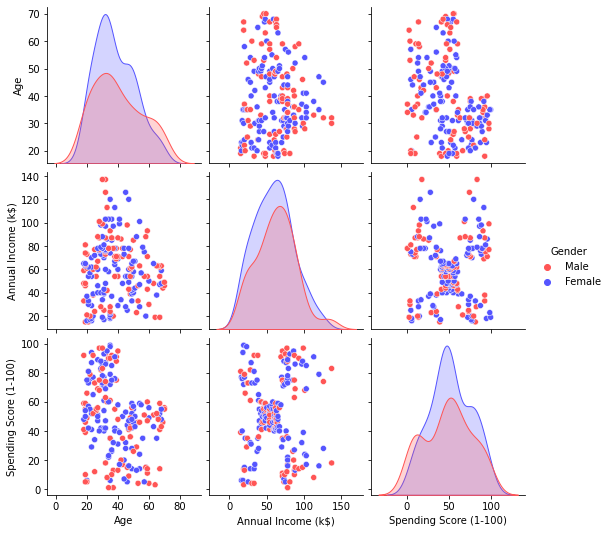

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Gender', palette='seismic_r')

### використовуємо метод elbow для пошуку оптимальної кількості кластерів
- для співвідношення вік та витрати
- для співвідношення доход та витрати

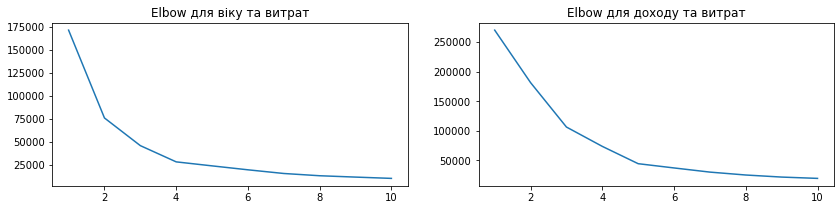

In [3]:
from sklearn.cluster import KMeans

X1 = df.drop('Gender', axis=1).drop('Annual Income (k$)', axis=1)
X2 = df.drop('Gender',axis=1).drop('Age', axis=1)

def wcss(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

wcss1 = wcss(X1)
wcss2 = wcss(X2)

fig, axes = plt.subplots(1, 2)
axes[0].set_title('Elbow для віку та витрат')
axes[1].set_title('Elbow для доходу та витрат')

axes[0].plot(range(1, 11), wcss1)
axes[1].plot(range(1, 11), wcss2)

fig.set_figheight(3)
fig.set_figwidth(14)
plt.show()

- _для співвідношення вік та витрати_ - **4** кластери
- _для співвідношення доход та витрати_ - **5** кластерів

### тренуємо модель
1. _співвідношення вік та витрати_

In [4]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X1)

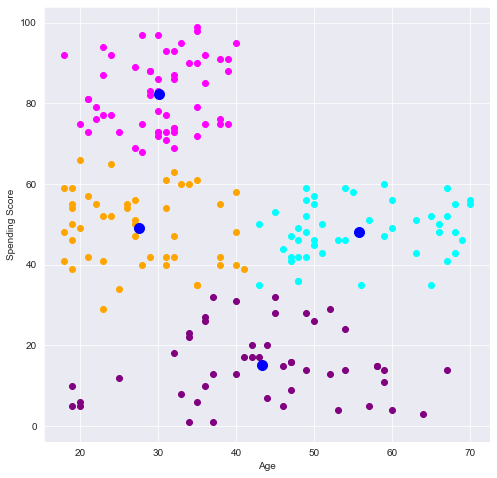

In [5]:
def gr_age_spend(X, y_kmeans, kmeans):
    sns.set_style('darkgrid')
    plt.figure(figsize=(8, 8))
    plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], c = 'purple')
    plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], c = 'magenta')
    plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], c = 'orange')
    plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], c = 'cyan')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue')
    plt.xlabel('Age')
    plt.ylabel('Spending Score')
    return plt.show()

gr_age_spend(X1, y_kmeans, kmeans)

In [6]:
X1['label'] = y_kmeans
X1[X1['label'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,57.0,30.175439,5.535995,18.0,27.0,30.0,35.0,40.0
Spending Score (1-100),57.0,82.350877,8.913255,68.0,75.0,81.0,90.0,99.0
label,57.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


#### _Виділяється група людей (57 осіб) у віці від 18 до 40 років, які мають найбільші витрати. Решта людей після 40 років так багато не витрачають_

2. _співвідношення доходи та витрати_

In [7]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)

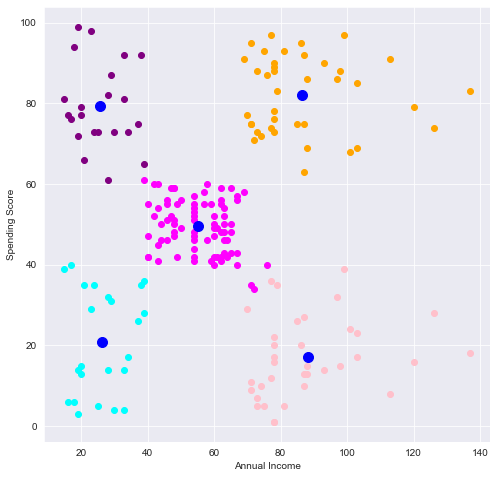

In [8]:
def gr_inc_spend(X, y_kmeans, kmeans):
    sns.set_style('darkgrid')
    plt.figure(figsize=(8, 8))
    plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], c = 'purple')
    plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], c = 'magenta')
    plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], c = 'orange')
    plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], c = 'cyan')
    plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], c = 'pink')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    return plt.show()

gr_inc_spend(X2, y_kmeans, kmeans)

In [9]:
X2['label'] = y_kmeans
X2[X2['label'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
Spending Score (1-100),39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
label,39.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [10]:
X2[X2['label'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),22.0,25.727273,7.566731,15.0,19.25,24.5,32.25,39.0
Spending Score (1-100),22.0,79.363636,10.504174,61.0,73.00,77.0,85.75,99.0
label,22.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [11]:
X2[X2['label'] == 4].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),35.0,88.200000,16.399067,70.0,77.5,85.0,97.5,137.0
Spending Score (1-100),35.0,17.114286,9.952154,1.0,10.0,16.0,23.5,39.0
label,35.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


#### _Виділимо 3 групи людей:_
1. 39 осіб, які мають веліки доходи і разом з тим багато витрачають
2. 22 людини, які мають дуже низький дохід і при цьому дуже високі витрати
3. 35 осіб, які мають найвищий дохід і при цьому найменьші витрати (мабуть дають гроші тім, кто у 2 групі :)))

### _ONLY MEN_

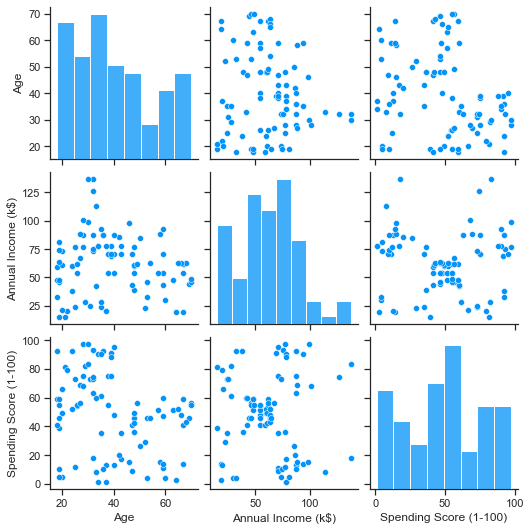

In [12]:
df_m = df.loc[df['Gender']=='Male']
sns.set(style="ticks", palette='terrain', color_codes=True)
sns.pairplot(df_m)

### тренуємо модель
1. _співвідношення вік та витрати_

In [13]:
X3 = df_m.drop('Gender', axis=1).drop('Annual Income (k$)', axis=1)
X4 = df_m.drop('Gender',axis=1).drop('Age', axis=1)

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)

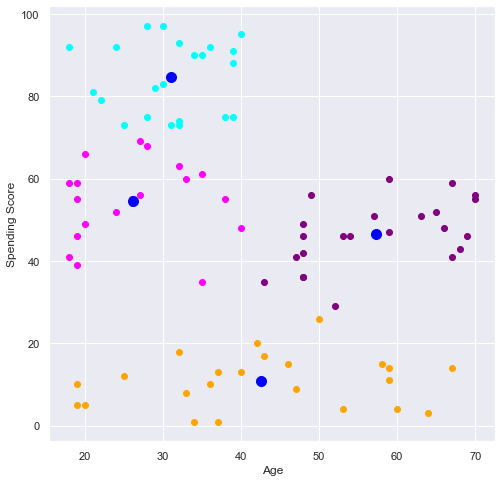

In [14]:
gr_age_spend(X3, y_kmeans, kmeans)

In [15]:
X3['label'] = y_kmeans
X3[X3['label'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,22.0,31.000000,6.301927,18.0,28.0,31.5,35.75,40.0
Spending Score (1-100),22.0,84.545455,8.749026,73.0,75.0,85.5,92.00,97.0
label,22.0,3.000000,0.000000,3.0,3.0,3.0,3.00,3.0


In [16]:
X3[X3['label'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23.0,42.608696,14.540661,19.0,33.5,42.0,55.5,67.0
Spending Score (1-100),23.0,10.782609,6.388602,1.0,5.0,11.0,14.5,26.0
label,23.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


#### _Висновки_
1. З 57 осіб у віці від 18 до 40 років, які мають найбільші витрати 22 людини - чоловіки.
2. 23 чоловіка входить в группу, яка має найнижчий рівень витрат, їх вік від 19 до 67 років. Як буде видно далі у жінок цей показник суттєво відрізняється.

2. _співвідношення доходи та витрати_

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X4)

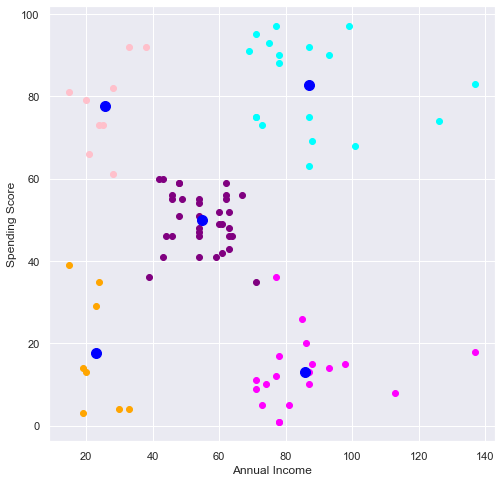

In [18]:
gr_inc_spend(X4, y_kmeans, kmeans)

In [19]:
X4['label'] = y_kmeans
X4[X4['label'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),18.0,87.111111,18.929867,69.0,73.50,82.5,91.75,137.0
Spending Score (1-100),18.0,82.666667,11.103788,63.0,74.25,85.5,91.75,97.0
label,18.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


In [20]:
X4[X4['label'] == 4].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),9.0,25.777778,6.960204,15.0,21.0,25.0,28.0,38.0
Spending Score (1-100),9.0,77.666667,10.606602,61.0,73.0,79.0,82.0,92.0
label,9.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


In [21]:
X4[X4['label'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),19.0,85.894737,16.110365,71.0,77.0,81.0,87.5,137.0
Spending Score (1-100),19.0,12.947368,8.422679,1.0,8.5,12.0,16.0,36.0
label,19.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### _ONLY WOMEN_

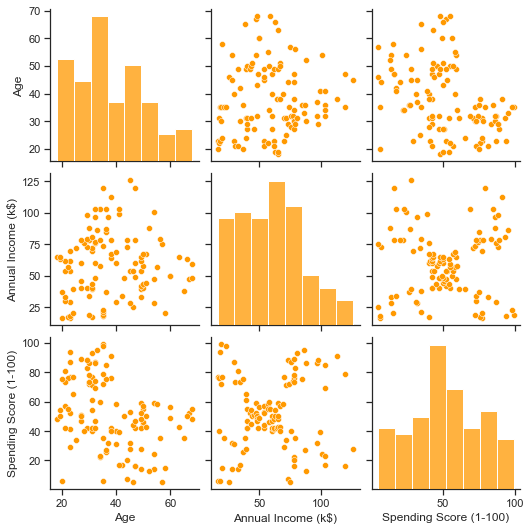

In [22]:
df_w = df.loc[df['Gender']=='Female']
sns.set(style="ticks", palette='gist_rainbow', color_codes=True)
sns.pairplot(df_w)

### тренуємо модель
1. _співвідношення вік та витрати_

In [23]:
X5 = df_w.drop('Gender', axis=1).drop('Annual Income (k$)', axis=1)
X6 = df_w.drop('Gender',axis=1).drop('Age', axis=1)

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X5)

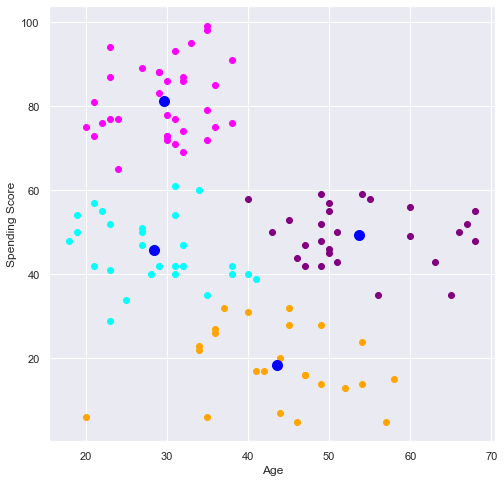

In [24]:
gr_age_spend(X5, y_kmeans, kmeans)

In [25]:
X5['label'] = y_kmeans
X5[X5['label'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34.0,29.617647,5.164064,20.0,24.75,30.0,32.75,38.0
Spending Score (1-100),34.0,81.235294,8.893507,65.0,74.25,78.5,87.75,99.0
label,34.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [26]:
X5[X5['label'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,24.0,43.583333,8.752225,20.0,36.75,44.5,49.00,58.0
Spending Score (1-100),24.0,18.500000,8.856341,5.0,13.75,17.0,26.25,32.0
label,24.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


#### _Висновки_
Жінки, як і чоловіки (в цьому датасеті), схильни до максимальних витрат у віці до 40 років. Але різниця в тому, що в цілому по группі рівень витрат жінок вище. В той час як по групі чоловікив спостерігались низьки витрати в будь-якому віці, то жінки в зоні витрат нижче 32 балів опинялись лише у віці від 34 до 58 років (одна 20-річна особа вибилась із цього списку, її не рахуємо).

2. _співвідношення доходи та витрати_

In [27]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X6)

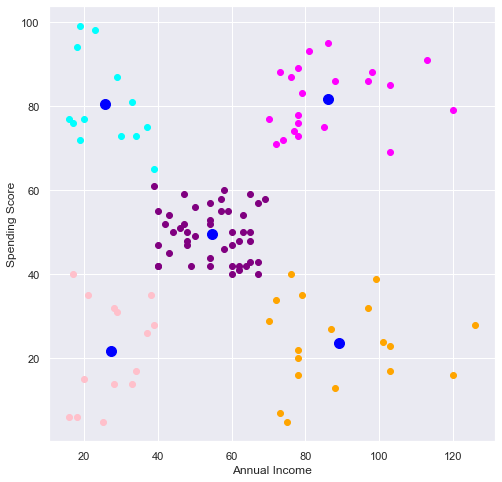

In [28]:
gr_inc_spend(X6, y_kmeans, kmeans)

In [29]:
X6['label'] = y_kmeans
X6[X6['label'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),13.0,25.692308,8.239990,16.0,19.0,23.0,33.0,39.0
Spending Score (1-100),13.0,80.538462,10.697472,65.0,73.0,77.0,87.0,99.0
label,13.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


#### _чоловіки з цього датасету частіше в ситуації коли витрати суттєво перевищують доходи (18 чоловіків/13 жінок)_

In [30]:
X6['label'] = y_kmeans
X6[X6['label'] == 4].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),14.0,27.357143,8.063280,16.0,20.25,28.0,33.75,39.0
Spending Score (1-100),14.0,21.714286,12.079408,5.0,14.00,21.5,31.75,40.0
label,14.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0


In [31]:
X6['label'] = y_kmeans
X6[X6['label'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),18.0,89.055556,16.748915,70.0,76.50,83.0,100.50,126.0
Spending Score (1-100),18.0,23.722222,10.242963,5.0,16.25,23.5,31.25,40.0
label,18.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


#### _процент жінок і чоловіків з датасету, маючих високий доход при низьких витратах, приблизно однаковий_